In [126]:
!pip install -U textblob
!python -m textblob.download_corpora
!pip install wordcloud

[nltk_data] Downloading package brown to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/chenxifang/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [166]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [167]:
import re 
import nltk 
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import pandas as pd 

In [47]:
file_path = '/Users/chenxifang/Documents/GitHub/helenchennlp/data/en_hashtag_astrazeneca.csv'
data_from_csv = pd.read_csv(file_path, encoding='utf-8') #Reads a CSV file into a pandas dataframe
data_from_csv.head(20) #show us the first 3 rows

text
0   ["Those who got their vaccines like me in the ...
1   ['#Pfizer , Johnson&amp;Johnson , #Moderna , #...
2   ['Crytoverse and Metaverse face any risk on sh...
3   ['What happened to the Astra Zeneca vaccine? #...
4   ['I am not anti vaccine or,as they insult a #C...
5   ["Just got boosted; see how my body likes #Pzi...
6   ['Impressive to just get a @NHSuk text message...
7   ['It’s been 7 months since my 2nd AZ jab and I...
8   ['I Sense a very Dark Political Agenda Behind ...
9   ["Half of the people who got vaccinated are in...
10  ['Sorry am I reading this right? #AstraZeneca ...
11  ['Any reactions from anyone who had two #Astra...
12  ['Really wish #AstraZeneca was available as a ...
13  ['Went for a cup of coffee, before I even got ...
14  ['In April #PeoplesVaccine Alliance calculated...
15  ['Doctors , what would happen if I take #Pfize...
16  ["#COVIDBOOSTER done. Got @pfizer this time. H...
17  ['To everyone who willing took the AstraZeneca...
18  ["In the beginning when most people weren´t aw...
19  ['Media is crazy globally. Omicron is here! Ge...

In [48]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
data_from_csv['Subjectivity'] = data_from_csv['text'].apply(getSubjectivity)
data_from_csv['Polarity'] = data_from_csv['text'].apply(getPolarity)

data_from_csv

text  Subjectivity  \
0      ["Those who got their vaccines like me in the ...      0.366667   
1      ['#Pfizer , Johnson&amp;Johnson , #Moderna , #...      0.000000   
2      ['Crytoverse and Metaverse face any risk on sh...      0.000000   
3      ['What happened to the Astra Zeneca vaccine? #...      0.000000   
4      ['I am not anti vaccine or,as they insult a #C...      0.700000   
...                                                  ...           ...   
23863  ['This is a move that will come to bite these ...      0.397222   
23864  ['🇩🇪#Germany &amp; 🇨🇵#France joining 13 other ...      0.325000   
23865  ['#AstraZeneca #Bundesgesundheitsminister plea...      0.500000   
23866  ['I would also like to hear from anyone that h...      0.600000   
23867  ['Morons, scared clueless incompetent morons. ...      0.545960   

       Polarity  
0      0.025000  
1      0.000000  
2      0.000000  
3      0.000000  
4     -0.150000  
...         ...  
23863 -0.047222  
23864  0.091667  
23865  0.500000  
23866 -0.300000  
23867 -0.312879  

[23868 rows x 3 columns]

In [49]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Netural'
    else:
        return 'Positive'
    
data_from_csv['Analysis']= data_from_csv['Polarity'].apply(getAnalysis)

#show the dataframe
data_from_csv

text  Subjectivity  \
0      ["Those who got their vaccines like me in the ...      0.366667   
1      ['#Pfizer , Johnson&amp;Johnson , #Moderna , #...      0.000000   
2      ['Crytoverse and Metaverse face any risk on sh...      0.000000   
3      ['What happened to the Astra Zeneca vaccine? #...      0.000000   
4      ['I am not anti vaccine or,as they insult a #C...      0.700000   
...                                                  ...           ...   
23863  ['This is a move that will come to bite these ...      0.397222   
23864  ['🇩🇪#Germany &amp; 🇨🇵#France joining 13 other ...      0.325000   
23865  ['#AstraZeneca #Bundesgesundheitsminister plea...      0.500000   
23866  ['I would also like to hear from anyone that h...      0.600000   
23867  ['Morons, scared clueless incompetent morons. ...      0.545960   

       Polarity  Analysis  
0      0.025000  Positive  
1      0.000000   Netural  
2      0.000000   Netural  
3      0.000000   Netural  
4     -0.150000  Negative  
...         ...       ...  
23863 -0.047222  Negative  
23864  0.091667  Positive  
23865  0.500000  Positive  
23866 -0.300000  Negative  
23867 -0.312879  Negative  

[23868 rows x 4 columns]

In [120]:
#Print all of the positive tweets 
positive =[]

j = 1
sortedDF = data_from_csv.sort_values(by=['Polarity'])
#text = str(sortedDF['text'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        to_print = (str(j) +')'+ sortedDF['text'][i])
        print(str(j) +')'+ sortedDF['text'][i])
        positive.append(to_print)  
        j = j+1
               

1)["Those who got their vaccines like me in the first round, do your cards have QR codes for dose 2?? Mine doesn't. I hear you can get your QR codes at Levy Hospital #CovidVaccine #AstraZeneca #Zambia"]
2)['Impressive to just get a @NHSuk text message to accelerate #Vaccine #Booster from 18th December to 4th December. Wondering if it will be a #Pfizer or #Moderna 🍸 with my #AstraZeneca 💉💉? #GetVaccinatedNow #Omicron']
3)['Really wish #AstraZeneca was available as a booster.']
4)['To everyone who willing took the AstraZeneca jab(s), did they tell you they were banned in Norway before you had them ?\n#AstraZeneca #banned #VaccineMandate']
5)["In the beginning when most people weren´t aware of the killing nature of this 'safe' vxxnes, I posted many tragic stories, often young people...\nYou can find these testimonies when entering @romromtin and #pfizer #death or #astrazeneca or #moderna in the search function."]
6)['I’m so thrilled to report that I am now on team #AstraZeneca  #Pfizer #P

1473)['Finally got vaccinated with our first dose of #AstraZeneca vaccine 💜']
1474)["There seems to be a bit of fear mongering with #AstraZeneca. I'm in my mid 30s and think it might be good get. @SAHealth it's seems you can't go though vaccination clinics and be under 60 and get it. @TGAgovau, is it worth the risk if you're NOT in NSW?"]
1475)['💥We have loved ones who live in countries with NO access to ANY #COVID19 #vaccines. In a few weeks I will be very happy to rock up to a mass vaccination hub for my 2nd #AstraZeneca dose. \n#vaccinated \n#COVID19Aus\n#COVID19nsw \n#COVID19Vic']
1476)["Happy to say I'm now on 2.5G- just got my first vaccination! \nI ad-pfizer you get it. #pfizer #AstraZeneca #GetVaccinatedNow"]
1477)['15 000 doses of #AstraZeneca Vaccine, allocated by the 🇱🇹 government, have been delivered to Tbilisi, 🇬🇪. A huge thank you to my colleague @GLandsbergis and all those involved in this process for their firm support and timely aid!']
1478)['2 of the top 100 wealthies

2232)['Dr @ScottMorrisonMP thanks for the advice last night. I have decided to ignore my GP and the AMA and book in for a #AstraZeneca shot. I don’t want to wait until 2025 and get the #Pfizer']
2233)['There was a pretty big push for #AstraZeneca over Pfizer or others from Scott Morrison and the #LNPCrimeFamily.  Can we check in to see if there were any shares in the company bought by members or family of the party? 👀']
2234)['I’m 28 and just got the first #AstraZeneca dose. Haven’t died yet, in fact haven’t had any adverse reaction at all so far.']
2235)['My 34 year old daughter is healthy and isn’t eligible yet for Pfizer.\n\nShe’s on the pill &amp; has chronic urticaria, which is related to auto immune issues. Still not eligible, even though at risk. She’s a mum.\n\nBut she can get an #AstraZeneca jab today.\n\nHow is this okay? #auspol']
2236)['Is general laziness part of the side effect from having your vaccination shot? If so, I wanna take a leave...\n\n#CovidVaccine #AstraZeneca

3227)["#AstraZeneca\nAll vaccines have had bumps along the road\nBut why have these been jumped on &amp; amplified for AZ. (actually Oxford Uni's vaccine)\nOxford did first deal with US Co MSD. Didn't trust Trump so MSD were ditched\nThen Ox insisted on no profit. So US Cos needed to stop them"]
3228)["I'm glad I didn't have any side effects from #jab2 #COVID19 #AstraZeneca this time!!!!!!!!"]
3229)['the government should publish  the data of #AstraZeneca results.\nOnly through data you can clear the misinformation about the vaccine.\n~Tony Blair']
3230)['If someone takes SII Covishield as first dose in India , is it okay to take second dose of Oxford AstraZeneca vaccine in abroad? #seruminstituteofindia #AstraZeneca']
3231)['Listened to @AndrewMarr9 show and cannot but wish for a return of Tony Blair as PM. After crucial advocacy of delayed 2nd dose his ideas on vaccine passes is the way to defeat #COVID19 and achieve maximum #Vaccination. Also right on #AstraZeneca efficacy']
3232)['

4231)["My mom's phone has been dinging like crazy sbb geng sekolah dia sibuk update tarikh book #AstraZeneca vaccine! So proud of our parents!! 😊💖"]
4232)['Harini hashtag #astrazeneca trending. Apparently, worldwide is getting this vaccine. Harini negara kita open for new registration. Ada satu tweet, an Aussie girl kena blood cloth katanya lepas jab AZ. Plizzz nooo 😭']
4233)['Are they using brand new ultra fine needles for each person? Otherwise can i bring my own.\n#vaccinate \n#PfizerVaccine \n#AstraZeneca \n#Sinovac \n#scarecrow']
4234)['I just want a big, refreshing glass of #AstraZeneca']
4235)["I am catching wiff that some #Politician's #Husband in the #SriLankan #Government has sold #AstraZeneca (#Covishield) #vaccines in the #BlackMarket at 5,000 LKR each. These were yours and my vaccines and 2nd doses. #SriLanka #COVID #SLPP #COVID19SL"]
4236)['Vaccination is the new synonym to rejuvenation #Covaxin #Covishield #CovishieldVaccine #CowinApp #LargestVaccineDrive #AstraZeneca #B

5331)["#Vaccinated today and I'm good. I just got really hungry (and ate a little too much too quickly) and the arm pain is really nothing compared to the arm pain I had after I did shading on my full sleeve tattoo.  #CucukMYAZ #firstdose #AstraZeneca"]
5332)['Among other things happening today, I also got vaccinated #AstraZeneca #GenXZeneca Zero hesitation, follow the science.\nHere’s to hoping that we, as a society, can get back to normal sooner than later. 🤘🤘']
5333)['Nearly 24 hours post-jab, with only some mild arm soreness and fever/chills overnight that were easily addressed with blankets. Not bad. #GenXZeneca #AstraZeneca #AZSymptoms']
5334)['Many people I know are not wanting to take a 2nd #AstraZeneca dose NOT because of the risk of rare conditions, but due to the side effects they experienced v virtually none with #PfizerBiontech &amp; #Moderna @MichelleRempel @BogochIsaac #cdnpoli @fordnation @celliottability #tcot']
5335)["One statistically rare death should not discourage

6230)['Very happy to have just received my first dose of #AstraZeneca. 💉💪😊']
6231)['Deputy CMO @ronan_glynn says \n\n“My own dad got the #AstraZeneca vaccine yesterday... he was delighted to get it” 💉\n\n#CovidVaccine']
6232)['So thankful to have finally received my first vaccination shot today. 🙏  #AstraZeneca  😷']
6233)["Just injection-site pain today. That's it. After a day and a half of chills, fatigue, muscle pain, and a low-grade temp. OK, then.... #AstraZeneca"]
6234)['Just had my first doze of #AstraZeneca vaccine. Nurses were great #NHSCovidVaccine']
6235)['I’ve got my appointment to get me some of that sweet, sweet #AstraZeneca on Saturday.']
6236)['Here this week many MD spouses are getting the #AstraZeneca #COVID19Vaccine \nIn discussion with colleagues today, interesting themes emerging - the same feelings of gratitude/relief/hope as when we got our own vaccines\nWe are on this emotional rollercoaster ride - today we are ok']
6237)['Day 2 #AstraZeneca side effect report: Z

7729)['If some folks don’t want their first dose of the #AstraZeneca vaccine, can I have my second shot now please?!! #getthejab']
7730)['To my delight its been a very busy #AstraZeneca clinic.. we also had many eligible patients in their 30’s who were still happy to have the vaccine as they read how low the risk was.. great work from the media to put the risks into perspective making our work less difficult..']
7731)['First vaccine on Tuesday - a subtle way to realise that your now actually old!!! 😩 #AstraZeneca #vaccinerollout 🇮🇲']
7732)['I happily had the #AstraZeneca jab today! I feel so grateful to everyone who is making this possible and giving me hope that life will go back to normal eventually.']
7733)['The anti-vax brigade must be thrilled to have the British media onboard who seem to be going the extra mile to discourage people from having their vaccine. #AstraZeneca is safe! Stop the scaremongering. 💉🦠']
7734)['Hi Twitterati, I have an #AstraZeneca vaccination question?\nI h

8729)['Spain allows #AstraZeneca up to 65 years old, France forbids Astrazeneca under 55,  Germany forbids it under 60. Does this all make any sense?']
8730)['The approved COVID-19 vaccines from Pfizer and Moderna use a new technology called mRNA, which acts like a genetic messenger. It’s never been used before in vaccines! #truth #mrna #vaccine #lies #AstraZeneca #moderna #johnsonandjohnson']
8731)['Just got my first shot of the best vaccine on the market haha not.\n\n#AprilFools (with 2 minutes to spare!)\n\n#AprilFoolsDay #auspol #ScottytheQueueJumper #astrazeneca']
8732)['All politicans have been vaccinated with available stock of free vaccine, majority jumping the queue #AstraZeneca\n\nMost likely they will now #UnlockOurCountry and start politicking as usual.']
8733)['Just had the #COVID19 #AstraZeneca #vaccine All good! (so far 😂)']
8734)["🇩🇪 - #German President Frank-Walter #Steinmeier, 65, received on Thursday April 1 a first dose of #AstraZeneca's #vaccine against Covid-19, i

9809)["#BREAKING US study of #AstraZeneca vaccine finds it's 100% effective at preventing people from falling seriously ill\n- 79% effective at stopping symptomatic #coronavirus\n- No safety issues regarding blood clots\n- It gives same protection to over-65s as to younger groups"]
9810)['This bad news about AstraZeneca makes think twice to receive that vaccine. I think, Sinovac is more secure because of the widely known method to produce the vaccine. #covid19 #vaccine #sinovac #AstraZeneca']
9811)['#AstraZeneca\nits time for the EU to block all exports until its completely had its own people are vaccinated tell the Uk to a run &amp; jump  #growapairEU \npush back time is here']
9812)['#AstraZeneca vaccine safe and effective in #USA , Chile, Peru trials. #COVID19 #vaccine #Pfizer #vaccination #finance #investing #investments #Growth #development #Nifty #nifty50 #bseindia #banknifty #banking #BSE #NSE #Modi #Biden']
9813)["After last week's tumultuous week for vaccines - this one could 

11172)["I'm not a chemist, but I suspect the main ingredient in the #AstraZeneca vaccine is sour grape"]
11173)['#Paracetamol side effects 🙈\n\n#Wine side effects   \n\n#FridayNightOut side effects \nmild headache to death \n\n1hr in the #Gym -mild aches, headache, can cause injury in extreme cases death \n\n#LIFE -  leads to death \n\n#AstraZeneca #Pfizer #CovidVaccine']
11174)["Around 30 blood clots reported in roughly 17 million vaccinations... that's lower than the general population level of blood clots. Which means there's more evidence that the vaccination actually PREVENTS blood clots... #AstraZeneca #vaccination #astrazenecavaccine"]
11175)['Who knew that the fight against vaccine misinformation would be against governments of some of the most developed countries in the world. I can’t quite believe it.\n#AstraZeneca']
11176)["70 million #AstraZeneca shots and only 40 people were found with blood clots. How is that a danger worth stopping Europe's rollout?"]
11177)['#VictoriaDe

In [122]:
#text = str(sortedDF['text'])
#print(text)
positive

['1)["Those who got their vaccines like me in the first round, do your cards have QR codes for dose 2?? Mine doesn\'t. I hear you can get your QR codes at Levy Hospital #CovidVaccine #AstraZeneca #Zambia"]',
 "2)['Impressive to just get a @NHSuk text message to accelerate #Vaccine #Booster from 18th December to 4th December. Wondering if it will be a #Pfizer or #Moderna 🍸 with my #AstraZeneca 💉💉? #GetVaccinatedNow #Omicron']",
 "3)['Really wish #AstraZeneca was available as a booster.']",
 "4)['To everyone who willing took the AstraZeneca jab(s), did they tell you they were banned in Norway before you had them ?\\n#AstraZeneca #banned #VaccineMandate']",
 '5)["In the beginning when most people weren´t aware of the killing nature of this \'safe\' vxxnes, I posted many tragic stories, often young people...\\nYou can find these testimonies when entering @romromtin and #pfizer #death or #astrazeneca or #moderna in the search function."]',
 "6)['I’m so thrilled to report that I am now on te

In [148]:
#print negative tweets
negative = []
j = 1
sortedDF = data_from_csv.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        to_print = (str(j) +')'+ sortedDF['text'][i])
        print(str(j) +')'+ sortedDF['text'][i])
        negative.append(to_print) 
        j = j+1


1)['I am not anti vaccine or,as they insult a #COVIDIDIOT, after having 2 jabs, my yearly flu jab and one to protect from pneumonia, I begin to question how much more boosters etc, could compromise my body ?\nNo hate speech please!\n#Booster #Moderna #COVID19 #covid  #AstraZeneca']
2)['I Sense a very Dark Political Agenda Behind This Whole New COVID-19 Variant 🤞#WHO #MandatoryVaccination #COVID19 #covidvariant #AstraZeneca #COVIDIOTS']
3)["Half of the people who got vaccinated are in serious chronic pains and wish they never took a jab. How Will the rest of the people who didn't take the jab trust y'all? #WHO #MandatoryVaccination #COVID19 #covidvariant #AstraZeneca #COVIDIOTS"]
4)['Sorry am I reading this right? #AstraZeneca was pulled in many countries after reports of blood clots.Yet here they are magically "tweaking" it to save you from a variant that doesn\'t exist.If you want a clot shot for Christmas, wire in. The world\'s gone bloody mad #Omicron']
5)['Any reactions from anyone

1496)['Is it normal to break out in small red blood spots under your skin? I seem to be coming out in patches since taking #AstraZeneca Vaccine alongside horrendous flu. Should I be concerned?']
1497)["Really not looking forward to the 4 buses I'm going to have to get for my second #AstraZeneca jab tomorrow."]
1498)['So I am confused @celliottability - so expiry dates for #AstraZeneca #vaccines are now suddenly null &amp; void? Is there science behind this or is it to save face for a govt that would appear to be wasting a vaccine because of their lousy rollout? @fordnation']
1499)['SIAPA YANG DAPAT BIGGEST PORTION OF 70 MIL?? Project Manager &amp; Project Assurance for AstraZeneca vaccine is a big company starts with P and end with C??? Tapi tak nak mengaku now sebab the project is so lousy??? Guess which company? #itrhymes #xoxo #gossipgirl #AstraZeneca']
1500)['Is it only me who feels bored, lethargic, tired, unenthusiastic after taking the #AstraZeneca vaccine? For past 2 weeks sinc

2495)['Signed up for #AstraZeneca when #Ottawa decided I lived in a High Risk area and that I was eligible..... that was 2 and a half weeks ago..... since then *Crickets*.\n#WheresMyVaccine #Ontario #Ottawa']
2496)['Taken the second dose of the #AstraZeneca vaccine and my vertigo has gone worst, the first attack happened when I took the first dose in Feb, so be careful']
2497)["Woke up COVERED, JUST ABSOLUTELY SOAKED, in sweat (you're welcome for the visual) but fever seems to have broken, temperature's 97.8, worst of it's over? 😃🤞 #GenXZeneca #VaccinesWork #AstraZeneca #vaxxed"]
2498)['I used more sick leave in the last two days (19.50 hours) recovering from the #AstraZeneca vaccine than I used all of fiscal year 2020. I am so lucky to have sick leave to use.  #PaidSickLeave #ontario']
2499)['Thursday, 29 April 2021\n\nThe #EU is pivoting to #Pfizer #vaccine -- and suing #AstraZeneca.\n\n#Trump lawyer Rudy Giuliani’s flat was searched by federal agents. #FBI']
2500)['Vaccine cocktail 

3466)['You have to be totally thick and lack common sense to take an experimental vaccine because your government tells you too! #AstraZeneca #bloodclots and it’s going to get worse!']
3467)['first #astrazeneca dose today at 11:30am and have had the worst fever of my life since 7pm (it’s now 2am). difficult to get through right now, unable to sleep or get the fever down but it will all be worth it in the end']
3468)['What about the other vaccinations, are there people with itp/blood cloths also? #AstraZeneca #ema #vonderleyen']
3469)['Looks like the woke doctors in Oxford have failed the British people yet again. #AstraZeneca #bloodclots #Oxford']
3470)['#Bloomberg made in #England  for #england ft. #AstraZeneca  NO thanks goodbye...go f.....yourself']
3471)['So, the #AstraZeneca vaccine is clearly not safe. Not as safe as it should be. And there is absolutely no come back or hope of compensation for any injured or killed. #astrazenecavaccine']
3472)['Wall to wall coverage by the #BBC 

3994)["#AstraZeneca is behind on #EU deliveries because of red tape and postering by the #eu\n\nYou can't keep saying you're not gonna confirm an order for weeks then bitch that the delivery is later than expected than the delivery date you were told when you first called in weeks before"]
3995)['#CovidVaccine update (2):\n\nI still went to work today though my body felt kinda heavy and sore. Still no fever and other symptoms. \n\n#AstraZeneca #COVID19']
3996)['I find it incredible after all the #EU’s threats of blocking #CovidVaccines - that the EU dictatorship are blaming the UK for they slow vaccine rollout - while they sit on over 15 million unused #AstraZeneca vaccines  - EU are evil! - thank god for #brexit']
3997)['It does seem that the #AstraZeneca jab will give you flu like side effects. I know 6 people who’ve reported feeling very ill after if for 3 to 4 days. Doesn’t mean you shouldn’t have it.']
3998)["Mam got vaccinated today💉!!! Hopefully Dad will be soon (although God kn

4648)["So.. my parents are about to be able to register to get the first dose of #Covid_19 vaccine, but it's going to be the #AstraZeneca one and I have to say, I'm quite scared. We survived a whole year without getting sick, so the news about #bloodclots seems so scary.. #coronavirus"]
4649)['Gosh. There\'s an awful lot of reductive "well do you want them or don\'t you?" going on isn\'t there?\n\n#AstraZeneca']
4650)['Norwegians blood clotting, Im not suprised its minus 25 degrees #COVID19 #AstraZeneca']
4651)['17 million #AstraZeneca vaccines given in #Europe - only 40 blood clots ...totally insignificant numbers. Ridiculous caution being displayed by them!']
4652)['Say it together now boys and girls: "correlation does not imply causation".  Repeat until it sinks in.  #AstraZeneca']
4653)['Cyrus Oguna is being used by the Jubilee govt badly.  President Uhuru must address Kenyans regarding the unsafe #AstraZeneca vaccine.']
4654)['I had my first Astra Zeneca jab last week and now I’ve

In [149]:
#check if the number of tweets in both arrays are correct
print(len(positive))
print(len(negative))

11562
5015


In [150]:
#put both in dataframe
positive_df = pd.DataFrame(positive, columns = ["text"])
negative_df = pd.DataFrame(negative,columns = ["text"])

In [151]:
#positive_df
negative_df

text
0     1)['I am not anti vaccine or,as they insult a ...
1     2)['I Sense a very Dark Political Agenda Behin...
2     3)["Half of the people who got vaccinated are ...
3     4)['Sorry am I reading this right? #AstraZenec...
4     5)['Any reactions from anyone who had two #Ast...
...                                                 ...
5010  5011)['Is Europe downplaying AstraZeneca to op...
5011  5012)['Crazy how EU Leaders are willing to dis...
5012  5013)['This is a move that will come to bite t...
5013  5014)['I would also like to hear from anyone t...
5014  5015)['Morons, scared clueless incompetent mor...

[5015 rows x 1 columns]

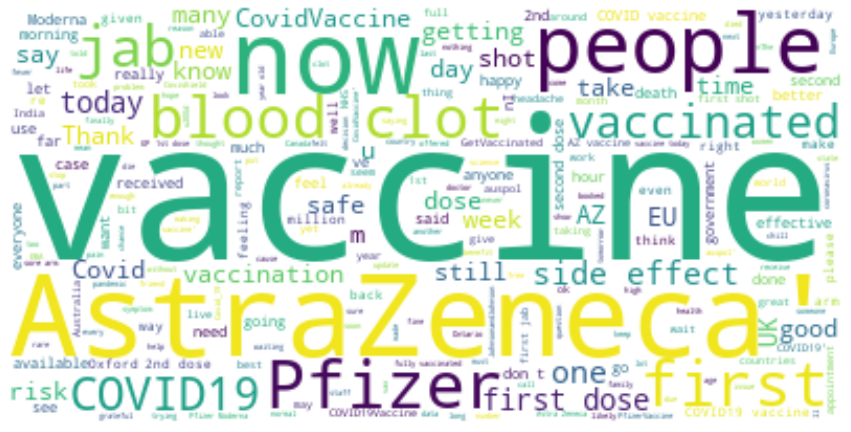

In [169]:
allWords = ''.join([twts for twts in positive_df['text']])
STOPWORDS.add('amp')
STOPWORDS.add('AstraZeneca')
STOPWORDS.add('n')
STOPWORDS.add('will')
STOPWORDS.add('s')
STOPWORDS.add('got')

wordCloud = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=2000, random_state = 30, max_font_size =100).generate(allWords)
fig, ax = plt.subplots(figsize=(15,10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

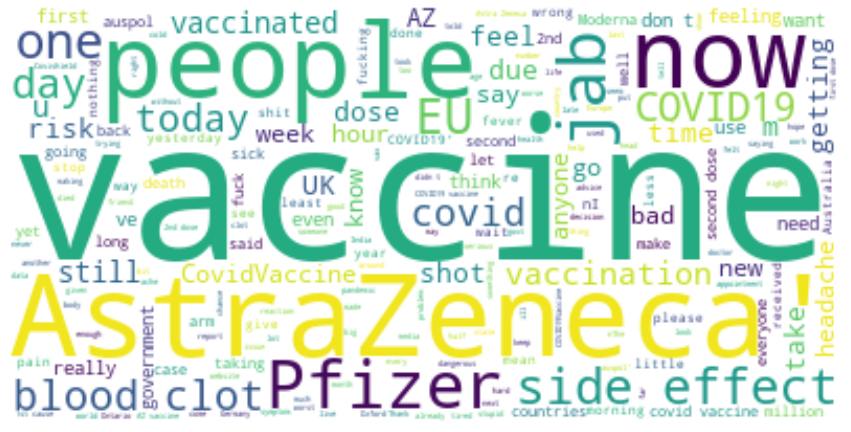

In [170]:
allWords = ''.join([twts for twts in negative_df['text']])
wordCloud = WordCloud(background_color='white',stopwords=STOPWORDS, max_words=2000, random_state = 30, max_font_size =100).generate(allWords)
fig, ax = plt.subplots(figsize=(15,10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()